**Course website**: http://lagex.github.io/geofisica2

**Note**: This notebook is part of the course "Geofísica 2" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [IPython notebook](http://ipython.org/notebook.html). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (que pode ser números, texto, figuras, videos, etc).

# Preparação para prática 2 - Terremotos

Vamos usar esse notebook para filtrar o catálogo de sismos do [GCMT](http://www.globalcmt.org/CMTfiles.html). Esse catálogo contem sismos de 1976 a 2013. O arquivo é muito grande e demora muito para podermos fazer qualquer coisa com ele. Por isso, vamos filtrar o catálogo por magnitude e sismos mais recentes para poder gerar uma figura dos mecanismos focais para o mundo todo.

Rode a célula abaixo para carregar as componentes necessárias. Vamos utilizar a biblioteca [obspy](http://obspy.org/) para carregar, filtrar e plotar os dados.

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import obspy
from obspy.imaging.beachball import Beach

Primeiro, vamos carregar o banco de dados inteiro. O arquivo do banco de dados está salvo na pasta `data`.

In [2]:
catalog = obspy.readEvents('../data/GCMT_jan76_dec13.ndk')

/home/leo/bin/anaconda/lib/python2.7/site-packages/obspy/ndk/core.py:202: ObsPyNDKWarning: Could not parse event 13965 (faulty file?). Will be skipped. Lines of the event:
	PDE  1996/11/20 19:42:56.1  10.30  127.43  33.0 5.6 5.3 PHILIPPINE ISLANDS REGIO
	B112096E         B: 35   58  45 S:  0    0   0 M:  0    0   0 CMT: 1 BOXHD: 22.0
	CENTROID:      1.060.0  10.47 0.03  127.42 0.03  15.0  0.0 BDY  O-00000000000000
	24 -4.983 0.133 -0.092 0.153  5.075 0.173 -0.433 0.443  0.715 0.469 -2.898 0.141
	V10   6.430  4 246  -1.390  2 156  -5.050 86  45   5.740 338 41  -88 154 49  -92
Traceback (most recent call last):
  File "/home/leo/bin/anaconda/lib/python2.7/site-packages/obspy/ndk/core.py", line 194, in read_ndk
    record = _read_lines(*lines)
  File "/home/leo/bin/anaconda/lib/python2.7/site-packages/obspy/ndk/core.py", line 519, in _read_lines
    map(float, line3[:58].split()[1:])
ValueError: invalid literal for float(): 1.060.0

  warnings.warn(msg, ObsPyNDKWarning)
/home/leo/bin/anac

In [3]:
print(catalog)

40512 Event(s) in Catalog:
1976-01-01T01:29:53.400000Z | -29.250, -176.960 | 7.25 Mwc
1976-01-05T02:31:44.700000Z | -13.420,  -75.140 | 5.65 Mwc
...
2013-12-31T21:32:03.600000Z | +19.090, +120.250 | 4.87 Mwc
2013-12-31T23:41:48.900000Z | +19.140, +120.200 | 5.23 Mwc
To see all events call 'print CatalogObject.__str__(print_all=True)'


Vou separar o globo em faixas longitudinais para tentar filtrar um número representativo de sismos de cada faixa. 
Filtrar somemente por magnitude resulta e muitos sismos nos limites convergentes e poucos na dorsal meso-atlântica e África.

In [4]:
filtrado = (
    catalog.filter('longitude >= -180', 'longitude <= -30', 'magnitude >= 6', 'magnitude <= 7', 
                   'time > 2005-01-01T00:00')
    + catalog.filter('longitude >= -30', 'longitude <= 60', 'magnitude >= 5.5', 'magnitude <= 6', 
                     'time > 2000-01-01T00:00', 'time < 2010-01-01T00:00')
    + catalog.filter('longitude >= 60', 'longitude <= 90', 'magnitude >= 6', 'magnitude <= 7', 
                     'time > 2005-01-01T00:00', 'time < 2015-01-01T00:00')
    + catalog.filter('longitude >= 60', 'longitude <= 180', 'magnitude >= 6', 'magnitude <= 7', 
                     'time > 2010-01-01T00:00', 'time < 2015-01-01T00:00')
)

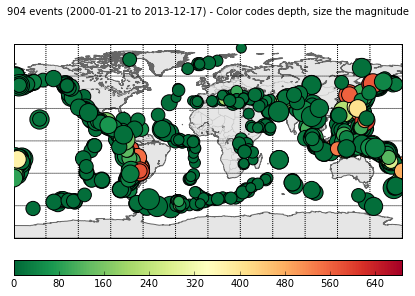

904 Event(s) in Catalog:
2005-01-16T08:25:09.000000Z | -25.550, -175.630 | 6.11 Mwc
2005-01-24T23:23:30.800000Z |  -1.530,  -80.950 | 6.1 Mwc
...
2013-12-08T17:24:57.900000Z | +44.530, +149.240 | 6.11 Mwc
2013-12-17T23:38:11.600000Z | +20.860, +146.990 | 6.19 Mwc
To see all events call 'print CatalogObject.__str__(print_all=True)'


In [5]:
filtrado.plot()
print(filtrado)

Vamos salvar esse catálogo filtrado para poder carregá-lo mais facilmente depois.

In [6]:
filtrado.write('../data/selected-earthquakes.qml', format="QUAKEML")

Se quiser pular os passos acima, podemos carregar os dados filtrados diretamente.

In [2]:
filtrado = obspy.readEvents('../data/selected-earthquakes.qml')

Agora podemos plotar os mecanismos focais de cada sismo em um mapa.

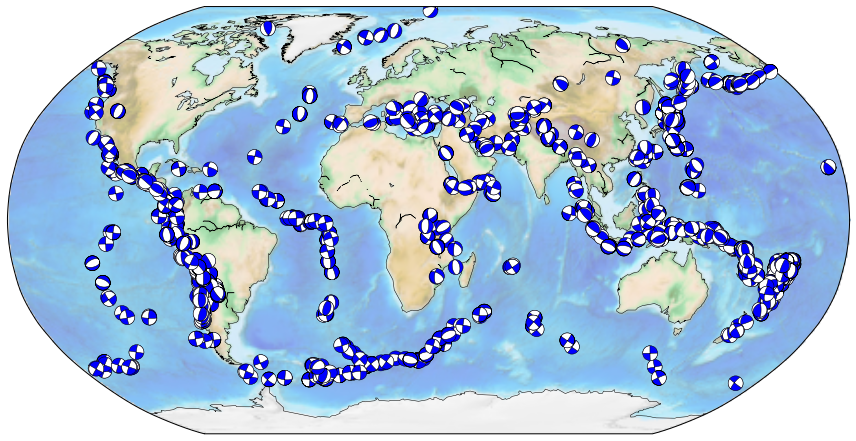

In [23]:
bm = Basemap(projection='robin', lon_0=30, resolution='c')
plt.figure(figsize=(12, 6.5))
ax = plt.subplot(111)
for event in filtrado:
    fc = event.focal_mechanisms[0]
    plane = fc.nodal_planes.nodal_plane_1
    origin = event.origins[0]
    bb = Beach([plane.strike, plane.dip, plane.rake], xy=bm(origin.longitude, origin.latitude), 
               width=600000, linewidth=0.5, facecolor='b')
    ax.add_collection(bb)
bm.etopo(alpha=0.5, scale=0.1)
bm.drawcoastlines(linewidth=0.5)
plt.tight_layout()
plt.savefig('../_static/img/sismos-mundo.jpg', dpi=200)